**LOGISTINEN REGRESSIO: KOHDEMUUTTUJANA MATKAN KOHDE, KOTIMAA VAI ULKOMAAT**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np


In [ ]:

df = pd.read_excel("YO_0_linregr_01.xlsx")
df

,majoitusmuoto,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,Yhteensä KOTI VA,1,1,11,1,26770,73470,2.7,2
1,Yhteensä KOTI T,1,2,12,1,4140,8270,2.0,1
2,Yhteensä ULKO VA,2,1,21,1,7100,43610,6.1,4
3,Yhteensä ULKO T,2,2,22,1,1950,9780,5.0,2
4,Yhteensä KOTI VA,1,1,11,2,26530,75620,2.9,2
5,Yhteensä KOTI T,1,2,12,2,3950,7160,1.8,1
6,Yhteensä ULKO VA,2,1,21,2,6990,42470,6.1,3
7,Yhteensä ULKO T,2,2,22,2,1580,6380,4.0,2
8,Yhteensä KOTI VA,1,1,11,3,25210,71830,2.8,2
9,Yhteensä KOTI T,1,2,12,3,3640,7000,1.9,1


In [ ]:

print(df.dtypes)

majoitusmuoto                   object
matkakohde                       int64
matkan tarkoitus                 int64
matkan tyyppi                    int64
vuosi                            int64
matkat yön yli lkm tuhansia      int64
yöpymiset lkm tuhansia           int64
matkan ka kesto yötä           float64
matkan med kesto yötä            int64
dtype: object


In [ ]:

convert_dict = {'matkakohde': str
                }
 
df = df.astype(convert_dict)
print(df.dtypes)

majoitusmuoto                   object
matkakohde                      object
matkan tarkoitus                 int64
matkan tyyppi                    int64
vuosi                            int64
matkat yön yli lkm tuhansia      int64
yöpymiset lkm tuhansia           int64
matkan ka kesto yötä           float64
matkan med kesto yötä            int64
dtype: object


In [ ]:

df['matkakohde'] = df['matkakohde'].replace(['1'], '0')#kotimaa 0
df['matkakohde'] = df['matkakohde'].replace(['2'], '1')#ulkomaat 1
df

,majoitusmuoto,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
0,Yhteensä KOTI VA,0,1,11,1,26770,73470,2.7,2
1,Yhteensä KOTI T,0,2,12,1,4140,8270,2.0,1
2,Yhteensä ULKO VA,1,1,21,1,7100,43610,6.1,4
3,Yhteensä ULKO T,1,2,22,1,1950,9780,5.0,2
4,Yhteensä KOTI VA,0,1,11,2,26530,75620,2.9,2
5,Yhteensä KOTI T,0,2,12,2,3950,7160,1.8,1
6,Yhteensä ULKO VA,1,1,21,2,6990,42470,6.1,3
7,Yhteensä ULKO T,1,2,22,2,1580,6380,4.0,2
8,Yhteensä KOTI VA,0,1,11,3,25210,71830,2.8,2
9,Yhteensä KOTI T,0,2,12,3,3640,7000,1.9,1


In [ ]:
#muutetaan matkakohde jälleen numeroksi
convert_dict = {'matkakohde': int
                }
 
df = df.astype(convert_dict)
print(df.dtypes)

majoitusmuoto                   object
matkakohde                       int64
matkan tarkoitus                 int64
matkan tyyppi                    int64
vuosi                            int64
matkat yön yli lkm tuhansia      int64
yöpymiset lkm tuhansia           int64
matkan ka kesto yötä           float64
matkan med kesto yötä            int64
dtype: object


In [ ]:

# Valitaan kohdemuuttuja y ja selittävät muuttujat taulun X sarakkeiksi

X = df.iloc[:, 5:7] #valittu matkat yön... ja yöpymiset lkm... -muuttujat selitemuuttujiksi

y = df.iloc[:, 1]  #valittu matkakohde-muuttuja kohdemuuttujaksi

print(y)

0     0
1     0
2     1
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    1
11    1
12    0
13    0
14    1
15    1
16    0
17    0
18    1
19    1
20    0
21    0
22    1
23    1
24    0
25    0
26    1
27    1
28    0
29    0
30    1
31    1
32    0
33    0
34    1
35    1
36    0
37    0
38    1
39    1
Name: matkakohde, dtype: int64


In [ ]:
print(X)

    matkat yön yli lkm tuhansia  yöpymiset lkm tuhansia
0                         26770                   73470
1                          4140                    8270
2                          7100                   43610
3                          1950                    9780
4                         26530                   75620
5                          3950                    7160
6                          6990                   42470
7                          1580                    6380
8                         25210                   71830
9                          3640                    7000
10                         7030                   41550
11                         1700                    8250
12                        25720                   72500
13                         3430                    6390
14                         7250                   41830
15                         1660                    6900
16                        25930                 

In [ ]:

#Filteröidään taulusta erilleen nollat ja ykköset, kotimaan ja ulkomaan matkat

UM = df.loc[y == 1]
KO = df.loc[y == 0]

UM

,majoitusmuoto,matkakohde,matkan tarkoitus,matkan tyyppi,vuosi,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia,matkan ka kesto yötä,matkan med kesto yötä
2,Yhteensä ULKO VA,1,1,21,1,7100,43610,6.1,4
3,Yhteensä ULKO T,1,2,22,1,1950,9780,5.0,2
6,Yhteensä ULKO VA,1,1,21,2,6990,42470,6.1,3
7,Yhteensä ULKO T,1,2,22,2,1580,6380,4.0,2
10,Yhteensä ULKO VA,1,1,21,3,7030,41550,5.9,4
11,Yhteensä ULKO T,1,2,22,3,1700,8250,4.9,2
14,Yhteensä ULKO VA,1,1,21,4,7250,41830,5.8,3
15,Yhteensä ULKO T,1,2,22,4,1660,6900,4.2,3
18,Yhteensä ULKO VA,1,1,21,5,7240,41630,5.8,3
19,Yhteensä ULKO T,1,2,22,5,1890,9130,4.8,2


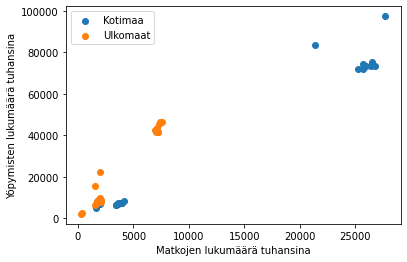

In [ ]:


# Sirontakuvio havainnoista (Kotimaa ja ulkomaat erikseen)

plt.scatter(KO.iloc[:,5],KO.iloc[:,6],label="Kotimaa")# y=0

plt.scatter(UM.iloc[:,5],UM.iloc[:,6],label="Ulkomaat")# y=1

plt.xlabel("Matkojen lukumäärä tuhansina")

plt.ylabel("Yöpymisten lukumäärä tuhansina")

plt.legend()

plt.show()



**Logistinen regressio, kohdemuuttujana matkankohde, joko kotimaan tai ulkomaan matka, ja selitemuuttujiksi valittu matkojen lukumäärä ja yöpymisten lukumäärä.** 

In [ ]:

# Jaetaan aineisto kahteen osaan: opetus- ja testiaineistoihin. Käytetty 75:25 jakoa.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

X_train

,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia
27,2060,7970
35,370,2780
37,1650,4900
2,7100,43610
39,280,2100
30,7350,45550
34,1960,22350
16,25930,73360
36,27720,97450
8,25210,71830


In [ ]:
y_train


27    1
35    1
37    0
2     1
39    1
30    1
34    1
16    0
36    0
8     0
13    0
5     0
17    0
14    1
33    0
7     1
32    0
1     0
26    1
12    0
31    1
24    0
6     1
23    1
21    0
19    1
9     0
38    1
3     1
0     0
Name: matkakohde, dtype: int64

**Otetaan käyttöön logistinen regressio malli**

In [ ]:
# Logistinen regressio -malli

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:

# Ennustetaan testiaineistolla matkakohde, kotimaa vai ulkomaat

y_pred = model.predict(X_test)

y_pred


array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:

X_test

,matkat yön yli lkm tuhansia,yöpymiset lkm tuhansia
22,7570,46480
20,26380,73240
25,3440,6480
4,26530,75620
10,7030,41550
15,1660,6900
28,25730,74490
11,1700,8250
18,7240,41630
29,3590,7270


In [ ]:

# testiaineiston y arvot
y_test

22    1
20    0
25    0
4     0
10    1
15    1
28    0
11    1
18    1
29    0
Name: matkakohde, dtype: int64

**Tehdään sekaannusmatriisi**

In [ ]:

#Sekaannusmatriisi
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix


array([[5, 0],
       [0, 5]])

**Kaikki 10 havaintoa ennustettu oikein sekaannusmatriisin mukaan.**

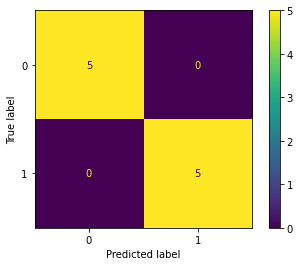

In [ ]:

# Sekaannusmatriisi lämpökarttana
cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()

plt.show()

**Lasketaan accuracy, precision ja recall -arvot**

In [ ]:

# Lasketaan accuracy, precision ja recall -arvot

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


**Malli ennusti kaikki arvot oikein, joten logistisen regression malli toimi erittäin hyvin. Tämä johtunee siitä, että kotimaan ja ulkomaan matkojen välillä on suuret erot sekä matkojen että yöpymisten lukumäärissä.**